# Analysis of Top 5 European Football Leagues – Season 2024/25

This notebook explores general match data from the 2024/25 season of the top five European football leagues: the English Premier League, La Liga, Serie A, Bundesliga, and Ligue 1. 

The goal is to perform initial data wrangling and exploratory data analysis (EDA) to better understand the structure and key characteristics of the dataset. This includes cleaning the data, deriving relevant features, and visualizing trends and patterns across leagues and teams.

This work aims to provide a broad understanding of football data.

## Set Up

In [1]:
# Import libraries for data handling and visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import os  # Operating system interface
import csv  # CSV file handling (optional; pandas covers most use cases)
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization built on matplotlib
from functools import reduce # Apply a function cumulatively to items of a sequence, reducing it to a single value

In [2]:
# Load dataset containing match statistics from the top 5 European football leagues
top5_df = pd.read_csv('/kaggle/input/top5-football-leagues-dataset/top5_df.csv')

# Display dataset structure: column names, data types, and missing values
print(top5_df.info())

# Show the first 10 rows to understand data format and sample content
print(top5_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   league         1752 non-null   object 
 1   season         1752 non-null   object 
 2   match_id       1752 non-null   int64  
 3   isResult       1752 non-null   bool   
 4   home_id        1752 non-null   int64  
 5   home_team      1752 non-null   object 
 6   home_abbr      1752 non-null   object 
 7   away_id        1752 non-null   int64  
 8   away_team      1752 non-null   object 
 9   away_abbr      1752 non-null   object 
 10  home_goals     1752 non-null   int64  
 11  away_goals     1752 non-null   int64  
 12  home_xG        1752 non-null   float64
 13  away_xG        1752 non-null   float64
 14  datetime       1752 non-null   object 
 15  forecast_win   1752 non-null   float64
 16  forecast_draw  1752 non-null   float64
 17  forecast_loss  1752 non-null   float64
dtypes: bool(

**Data Overview:**

The dataset contains match-level data for teams from the top 5 European football leagues (Premier League, La Liga, Serie A, Bundesliga, Ligue 1) across the 2024/2025 season. The variables are: 
* league
* season
* match_id
* isResult
* home_id
* home_team
* home_abbr
* away_id
* away_team
* away_abbr
* home_goals
* away_goals
* home_xG
* away_xG
* datetime
* forecast_win
* forecast_draw
* forecast_loss

## Data Wrangling

In [3]:
# Count how many matches have 'isResult' flag and how many seasons are in the dataset
print(top5_df['isResult'].value_counts())
print(top5_df['season'].value_counts())

#Drop unnecessary variables
top5_df = top5_df.drop(columns=['isResult', 'season'])

#Print the first lines of the dataset
print(top5_df.head(10))

isResult
True    1752
Name: count, dtype: int64
season
2024/2025    1752
Name: count, dtype: int64
       league  match_id  home_id               home_team home_abbr  away_id  \
0  Bundesliga     27742      130     Borussia M.Gladbach       BMG      119   
1  Bundesliga     27743      136  RasenBallsport Leipzig       RBL      268   
2  Bundesliga     27744      120              Hoffenheim       HOF      287   
3  Bundesliga     27745      135                Freiburg       FRE      133   
4  Bundesliga     27746      121                Augsburg       AUG      123   
5  Bundesliga     27747      125                Mainz 05       MAI      240   
6  Bundesliga     27748      129       Borussia Dortmund       DOR      132   
7  Bundesliga     27749      131               Wolfsburg       WOL      117   
8  Bundesliga     27750      288               St. Pauli       SPA      280   
9  Bundesliga     27751      240            Union Berlin       UNI      288   

             away_team away_abb

In [4]:
# Assign actual and expected points based on results
def assign_points(home, away):
    return np.select([home > away, home == away], [3, 1], default=0)

top5_df['home_team_points'] = assign_points(top5_df['home_goals'], top5_df['away_goals'])
top5_df['away_team_points'] = assign_points(top5_df['away_goals'], top5_df['home_goals'])
top5_df['home_team_xP'] = assign_points(top5_df['home_xG'], top5_df['away_xG'])
top5_df['away_team_xP'] = assign_points(top5_df['away_xG'], top5_df['home_xG'])

# Preview
print(top5_df.head(10))

       league  match_id  home_id               home_team home_abbr  away_id  \
0  Bundesliga     27742      130     Borussia M.Gladbach       BMG      119   
1  Bundesliga     27743      136  RasenBallsport Leipzig       RBL      268   
2  Bundesliga     27744      120              Hoffenheim       HOF      287   
3  Bundesliga     27745      135                Freiburg       FRE      133   
4  Bundesliga     27746      121                Augsburg       AUG      123   
5  Bundesliga     27747      125                Mainz 05       MAI      240   
6  Bundesliga     27748      129       Borussia Dortmund       DOR      132   
7  Bundesliga     27749      131               Wolfsburg       WOL      117   
8  Bundesliga     27750      288               St. Pauli       SPA      280   
9  Bundesliga     27751      240            Union Berlin       UNI      288   

             away_team away_abbr  home_goals  away_goals   home_xG   away_xG  \
0     Bayer Leverkusen       LEV           2      

In [5]:
# Define aggregation specs
agg_specs = [
    ('home_team', 'league', 'first', 'league'),
    ('home_team', 'home_goals', 'sum', 'total_home_goals'),
    ('away_team', 'away_goals', 'sum', 'total_away_goals'),
    ('home_team', 'home_xG', 'sum', 'total_home_xG'),
    ('away_team', 'away_xG', 'sum', 'total_away_xG'),
    ('home_team', 'home_team_points', 'sum', 'home_points'),
    ('away_team', 'away_team_points', 'sum', 'away_points'),
    ('home_team', 'home_team_xP', 'sum', 'home_xP'),
    ('away_team', 'away_team_xP', 'sum', 'away_xP')
]

# Aggregate and rename in loop
agg_dfs = []
for group_col, val_col, method, new_name in agg_specs:
    df = top5_df.groupby(group_col, as_index=False).agg({val_col: method})
    df.rename(columns={group_col: 'team', val_col: new_name}, inplace=True)
    agg_dfs.append(df)

# Merge all aggregated dataframes
team_df = reduce(lambda left, right: pd.merge(left, right, on='team'), agg_dfs)

# Calculate totals and metrics
team_df['total_goals'] = team_df['total_home_goals'] + team_df['total_away_goals']
team_df['total_xG'] = team_df['total_home_xG'] + team_df['total_away_xG']
team_df['total_points'] = team_df['home_points'] + team_df['away_points']
team_df['total_xP'] = team_df['home_xP'] + team_df['away_xP']

# Per-game stats based on league match count
match_counts = {'La_liga': 38, 'Serie_A': 38, 'EPL': 38}
team_df['matches'] = team_df['league'].map(match_counts).fillna(34).astype(int)
team_df['goals_per_game'] = team_df['total_goals'] / team_df['matches']
team_df['xG_per_game'] = team_df['total_xG'] / team_df['matches']

team_df['points_overperforming'] = team_df['total_points'] - team_df['total_xP']
team_df['goals_per_xG'] = team_df['total_goals'] / team_df['total_xG']

# Preview
print(team_df.head(10))


              team      league  total_home_goals  total_away_goals  \
0         AC Milan     Serie_A                30                31   
1           Alaves     La_liga                14                24   
2           Angers     Ligue_1                18                14   
3          Arsenal         EPL                35                34   
4      Aston Villa         EPL                34                24   
5         Atalanta     Serie_A                36                42   
6    Athletic Club     La_liga                32                22   
7  Atletico Madrid     La_liga                42                26   
8         Augsburg  Bundesliga                18                17   
9          Auxerre     Ligue_1                24                24   

   total_home_xG  total_away_xG  home_points  away_points  home_xP  away_xP  \
0      31.668365      37.841776           34           29       39       39   
1      22.548204      23.828730           24           18       33     

**Data Cleaning and Preparation:**
I first removed unnecessary variables (`isResult` and `season`) from the dataset.  
Then I computed **actual points** and **expected points (xP)** for each match based on goals and expected goals.  
For this, I assigned 3 points for a win, 1 for a draw, and 0 for a loss — both for actual results and for expected outcomes.


**Transformation to Team-level:**
To consolidate match data into team-level metrics, I summed up home and away goals, points, and expected points separately and then merged them into a single DataFrame.


**Summary Metrics Calculated:**
From this, I derived:
- **Total goals:** Home plus away goals.
- **Total expected goals (xG):** Home plus away xG.
- **Total points:** Actual points from match results.
- **Total expected points (xP):** Expected points based on xG.
- **Points overperformance:** Difference between actual points and expected points.
- **Goals per game:** Goals divided by total number of matches.
- **Expected goals per game:** xG divided by total number of matches.
- **Goals per xG:** Ratio of goals to expected goals.




In [6]:
# Print the Bundesliga table (If teams have equal points the table can be wrong as the goals difference is not considered on the second level)
team_df[team_df['league']=='Bundesliga'].sort_values(by='total_points', ascending = False)

,team,league,total_home_goals,total_away_goals,total_home_xG,total_away_xG,home_points,away_points,home_xP,away_xP,total_goals,total_xG,total_points,total_xP,matches,goals_per_game,xG_per_game,points_overperforming,goals_per_xG
12,Bayern Munich,Bundesliga,53,46,55.768840,39.248274,44,38,51,45,99,95.017114,82,96,34,2.911765,2.794621,-14,1.041918
11,Bayer Leverkusen,Bundesliga,36,36,35.466102,27.572191,34,35,39,27,72,63.038293,69,66,34,2.117647,1.854067,3,1.142163
26,Eintracht Frankfurt,Bundesliga,41,27,40.537510,32.307412,34,26,45,21,68,72.844922,60,66,34,2.000000,2.142498,-6,0.933490
15,Borussia Dortmund,Bundesliga,44,27,38.299317,30.440131,36,21,39,27,71,68.739448,57,66,34,2.088235,2.021748,-9,1.032886
32,Freiburg,Bundesliga,32,17,26.893574,27.665451,30,25,24,30,49,54.559025,55,54,34,1.441176,1.604677,1,0.898110
52,Mainz 05,Bundesliga,24,31,30.854922,24.966220,26,26,36,21,55,55.821142,52,57,34,1.617647,1.641798,-5,0.985290
92,Werder Bremen,Bundesliga,21,33,30.338597,25.923651,21,30,33,27,54,56.262248,51,60,34,1.588235,1.654772,-9,0.959791
68,RasenBallsport Leipzig,Bundesliga,33,20,30.516493,21.819099,30,21,30,15,53,52.335592,51,45,34,1.558824,1.539282,6,1.012695
90,VfB Stuttgart,Bundesliga,35,29,39.533557,31.652542,23,27,36,24,64,71.186099,50,60,34,1.882353,2.093709,-10,0.899052
16,Borussia M.Gladbach,Bundesliga,29,26,29.437679,24.019309,24,21,24,15,55,53.456988,45,39,34,1.617647,1.572264,6,1.028865


## Exploratory Data Analysis

### Home Goals vs Away Goals

In [7]:
# Print the correlation between home and away goals
print("Correlation between Home Goals and Away Goals is:", team_df['total_home_goals'].corr(team_df['total_away_goals']))

Correlation between Home Goals and Away Goals is: 0.6777825844273975


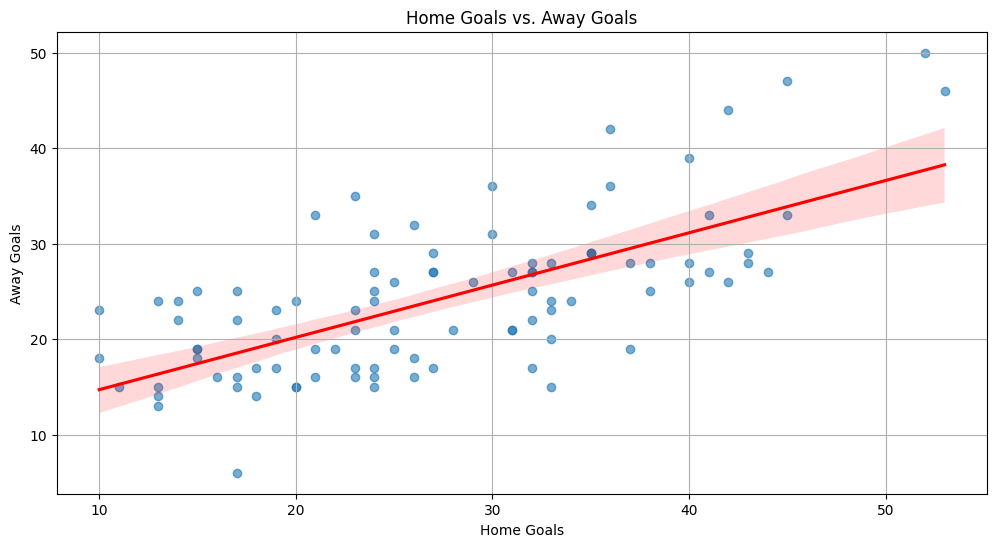

In [8]:
# Visualize the relationship between home goals and away goals for teams
plt.figure(figsize=(12, 6))
sns.regplot(data=team_df, x='total_home_goals', y='total_away_goals', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Home Goals vs. Away Goals')
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.grid(True)
plt.show()

The scatter plot shows a positive correlation between home and away goals for teams. This suggests that teams that score more goals at home also tend to score more goals when playing away. Such a pattern may reflect overall team strength or attacking capability regardless of venue.

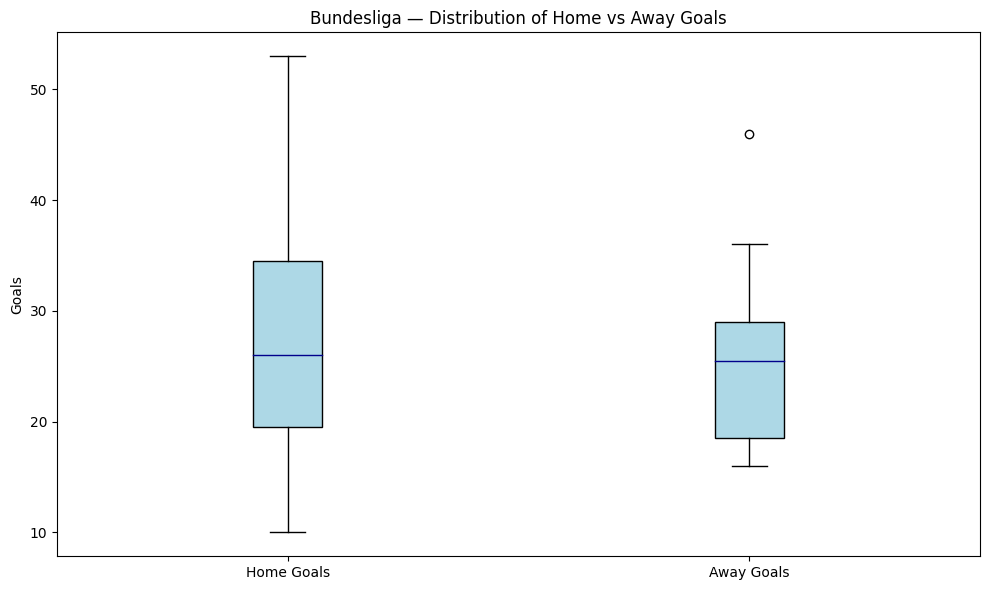

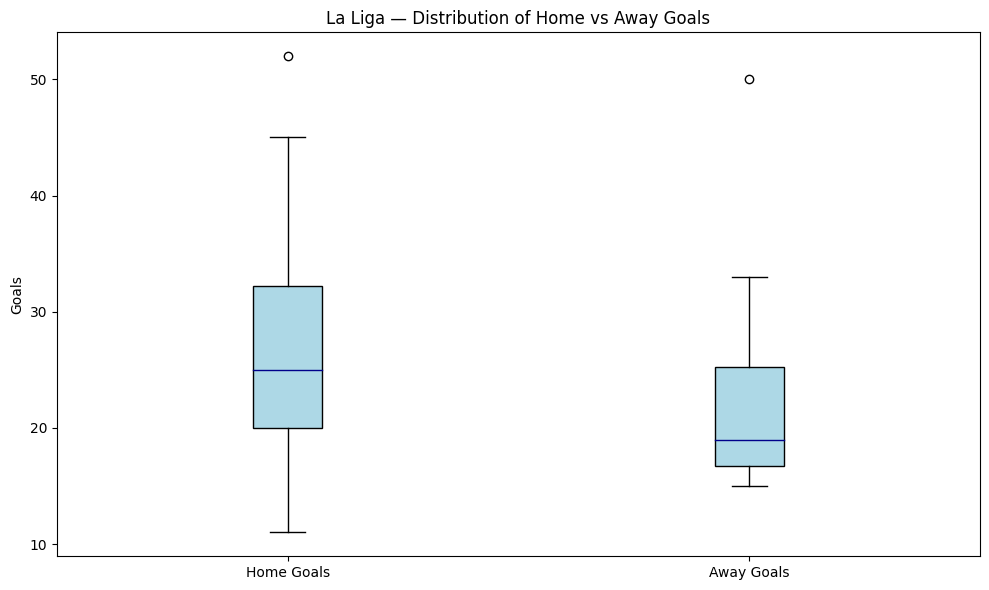

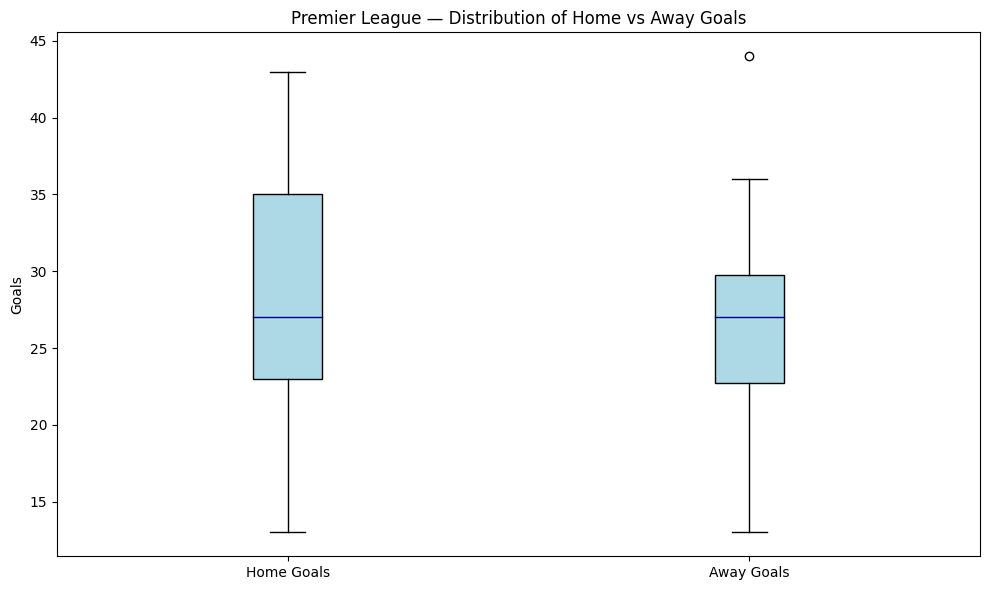

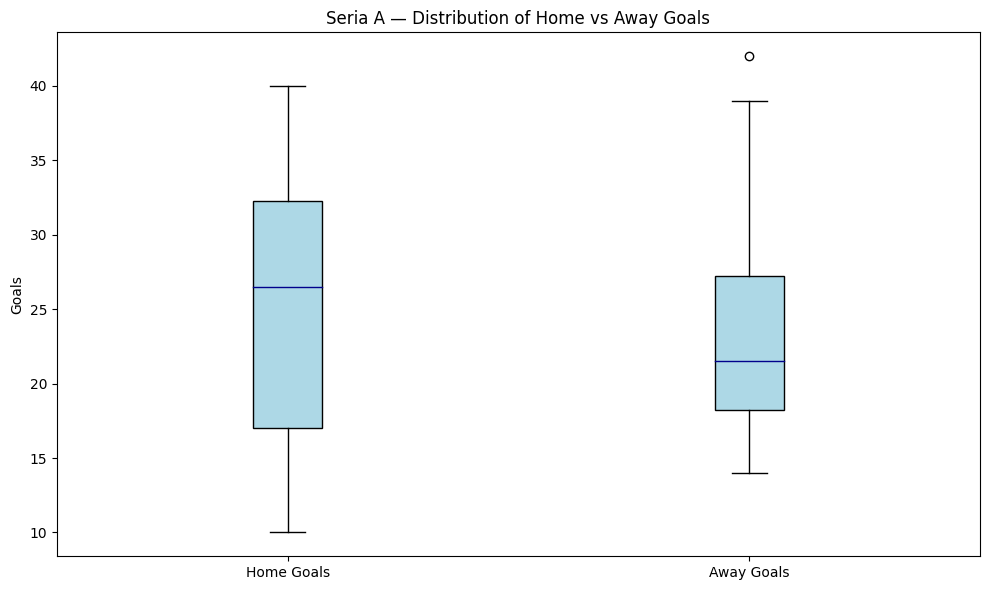

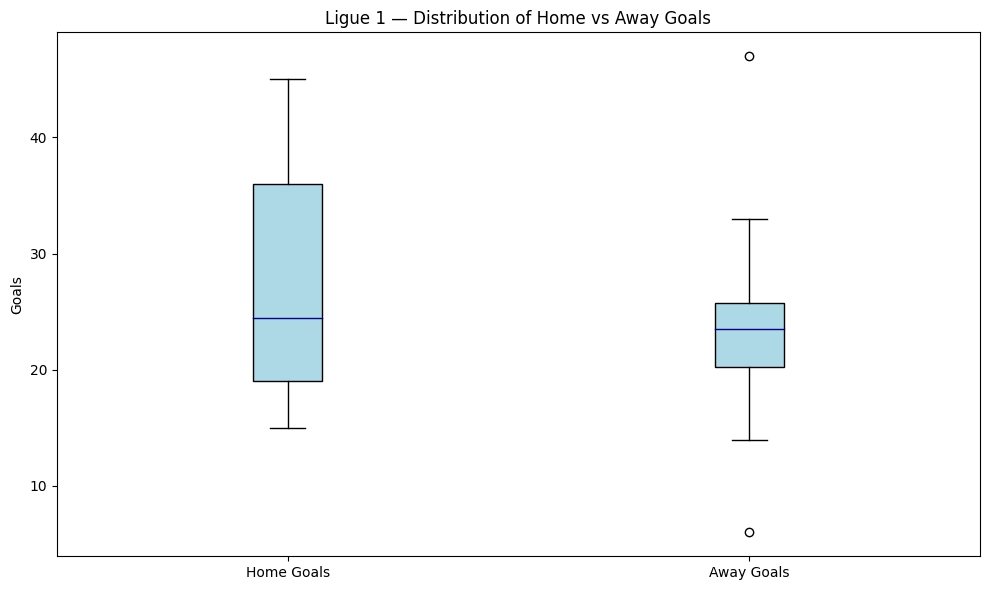

In [9]:
# Define a function to plot a boxplot comparing the distribution of home and away goals for teams given the league
def plot_home_away_goals_boxplot(team_df, league_name, league_title):
    df = team_df[team_df['league'] == league_name]

    data = [df['total_home_goals'], df['total_away_goals']]
    labels = ['Home Goals', 'Away Goals']

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='darkblue'))

    plt.ylabel('Goals')
    plt.title(f'{league_title} — Distribution of Home vs Away Goals')
    plt.tight_layout()
    plt.show()

# Call the functions for each league
leagues = {
    'Bundesliga': 'Bundesliga',
    'La_liga': 'La Liga',
    'EPL': 'Premier League',
    'Serie_A': 'Seria A',
    'Ligue_1': 'Ligue 1'
}

for league_code, league_title in leagues.items():
    plot_home_away_goals_boxplot(team_df, league_code, league_title)

For each league, there are two box plots—one representing the distribution of home goals scored by teams and the other for away goals scored by teams. Across all leagues, the distribution of home goals per team is wider than that of away goals, indicating greater variability in teams’ scoring performance at home compared to away matches.

### Expected Points

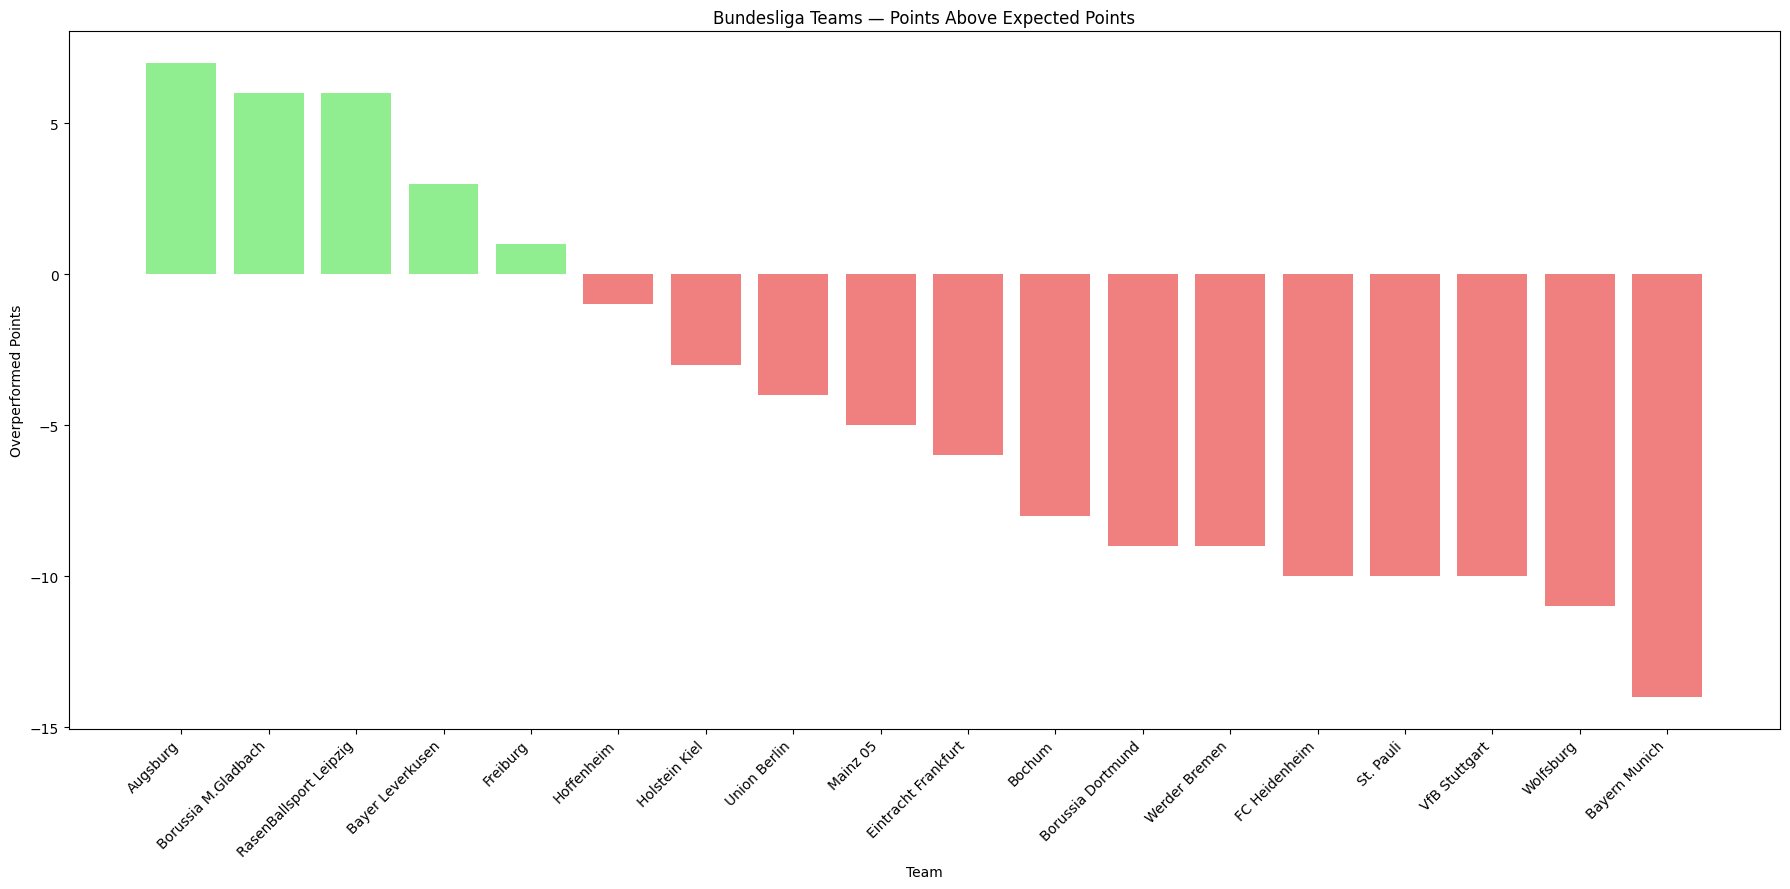

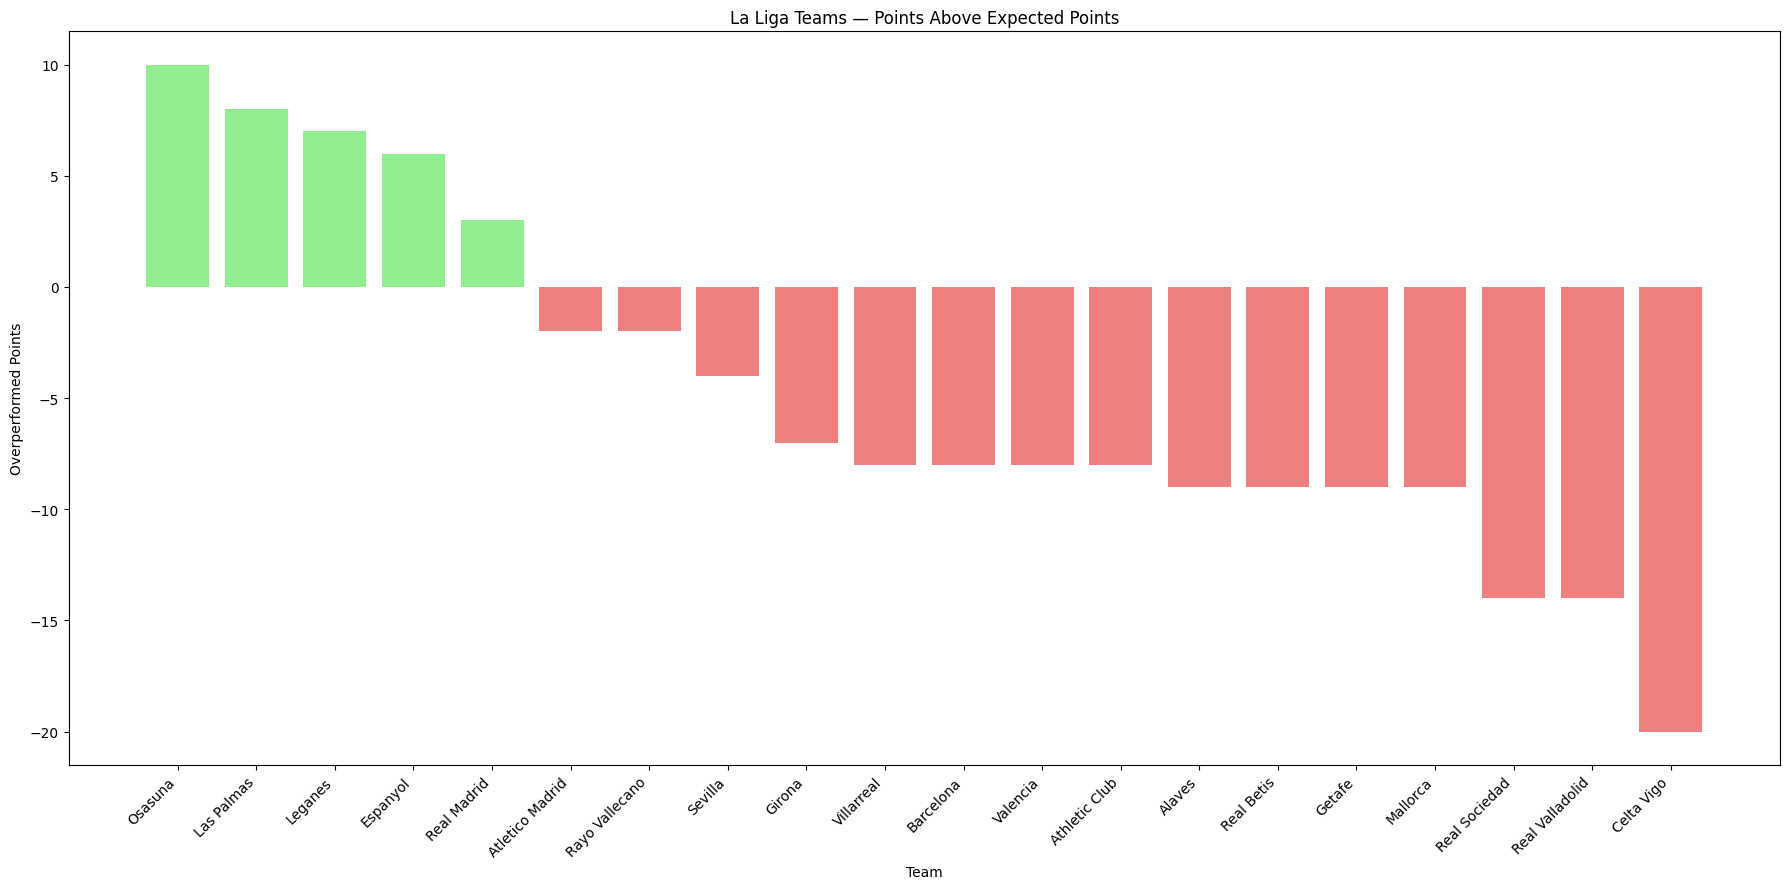

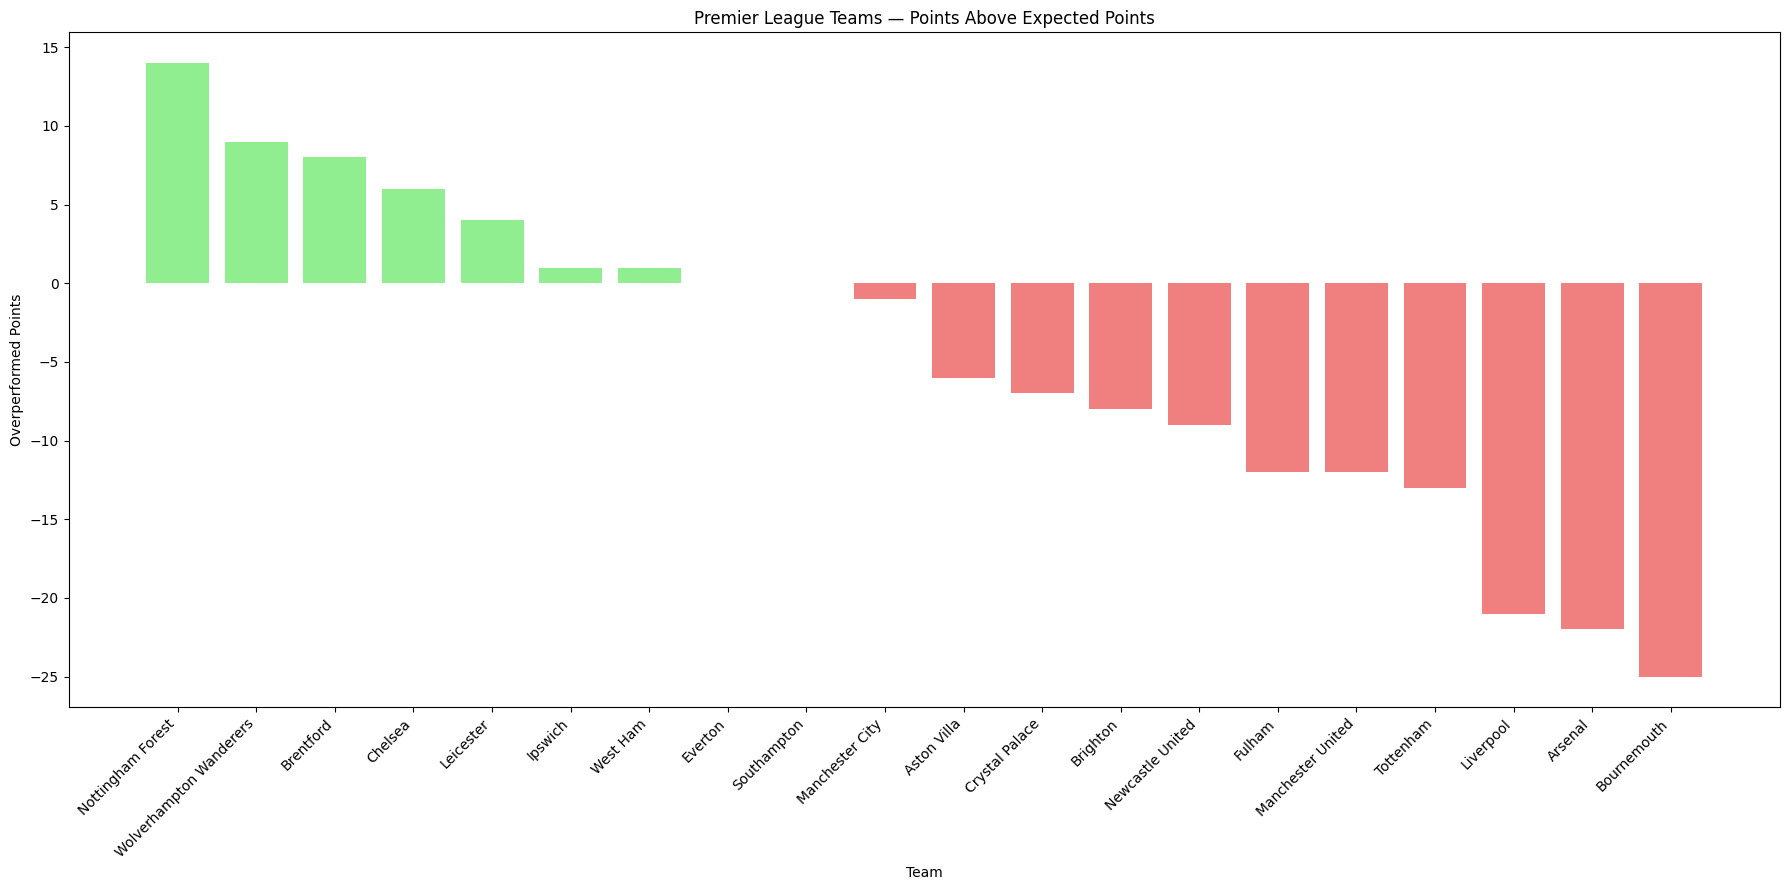

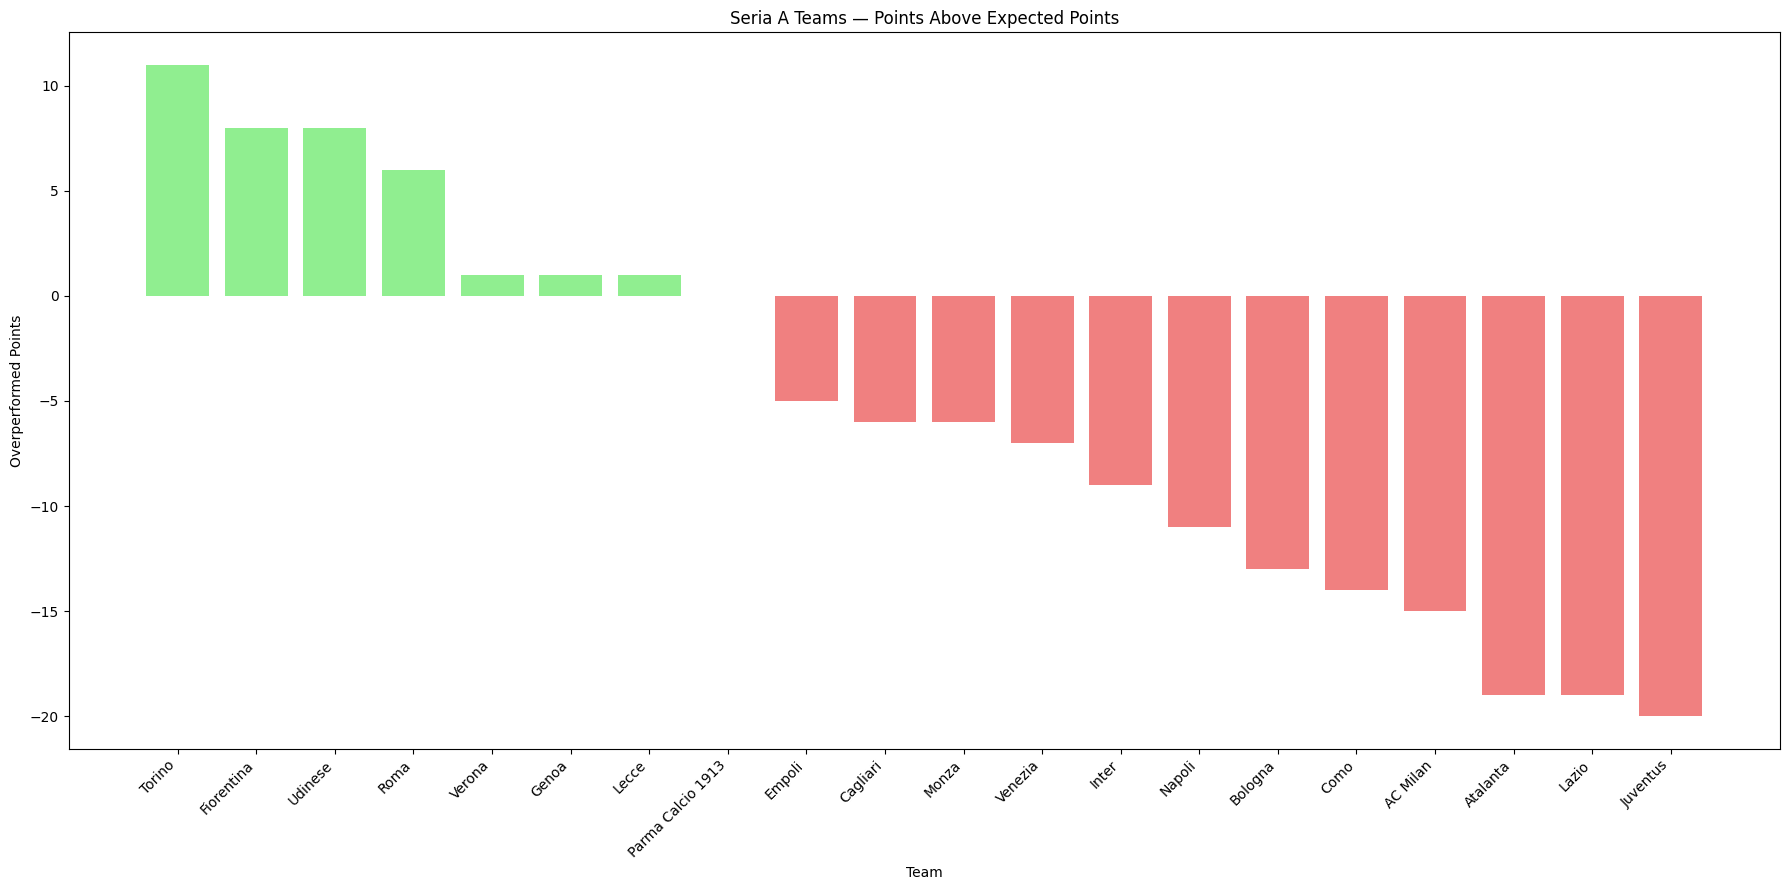

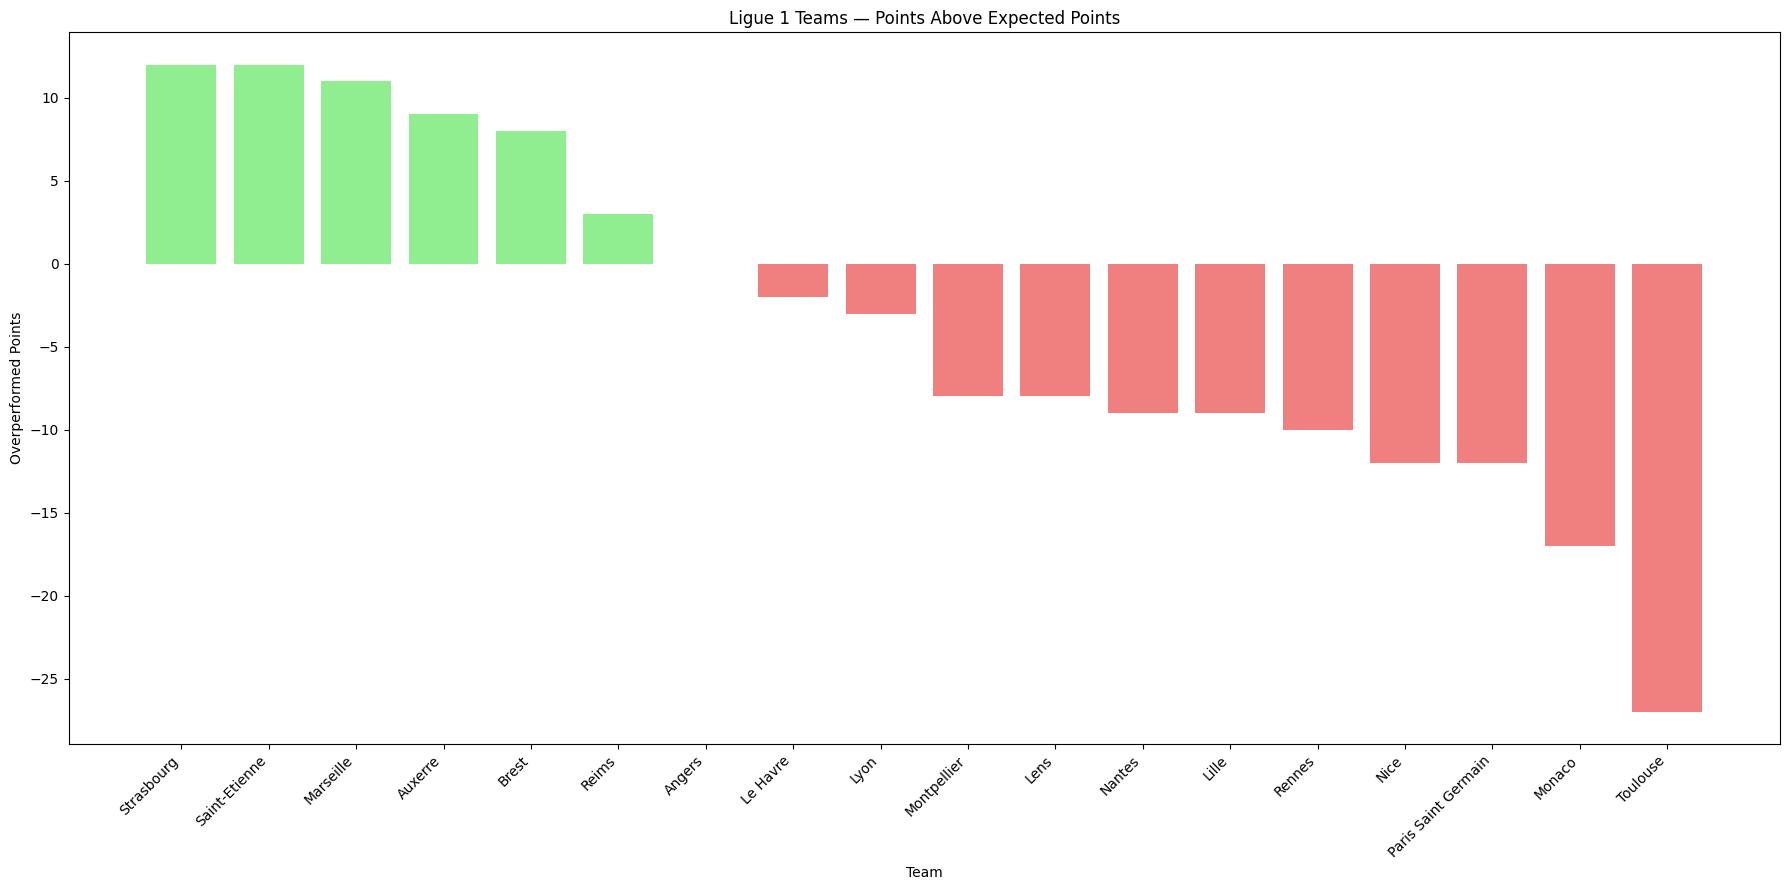

In [10]:
# Define a function to plot a bar chart of points overperformance for each team given the league
def plot_overperformance_by_league(team_df, league_name, league_title):
    df = team_df[team_df['league'] == league_name].sort_values(by='points_overperforming', ascending=False)
    colors = np.where(df['points_overperforming'] > 0, 'lightgreen', 'lightcoral')
    
    plt.figure(figsize=(18, 9))
    plt.bar(df['team'], df['points_overperforming'], color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Team')
    plt.ylabel('Overperformed Points')
    plt.title(f'{league_title} Teams — Points Above Expected Points')
    plt.tight_layout()
    plt.show()

# Call the function
for league_code, league_name in leagues.items():
    plot_overperformance_by_league(team_df, league_code, league_name)

The bar plot shows the ratio of expected to actual points for each team in the Bundesliga, EPL, La Liga, Serie A, and Ligue 1. In each league, both overperforming teams (expected < actual) and underperforming teams (expected > actual) can be identified, highlighting differences in how efficiently teams convert performances into results.

### Expected Goals

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


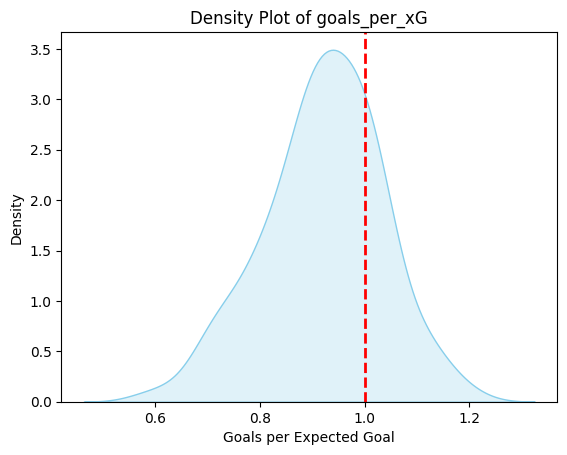

In [11]:
# Visualize the distribution of the 'goals_per_xG' ratio to understand how teams perform relative to their expected goals
sns.kdeplot(team_df['goals_per_xG'], fill=True, color='skyblue')
plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label='x=1')
plt.title('Density Plot of goals_per_xG')
plt.xlabel('Goals per Expected Goal')
plt.ylabel('Density')
plt.show()


The density plot reveals that, on average, teams score fewer goals than expected, with most values falling below the one-to-one line. However, some teams outperform expectations by averaging more goals than their expected goals.

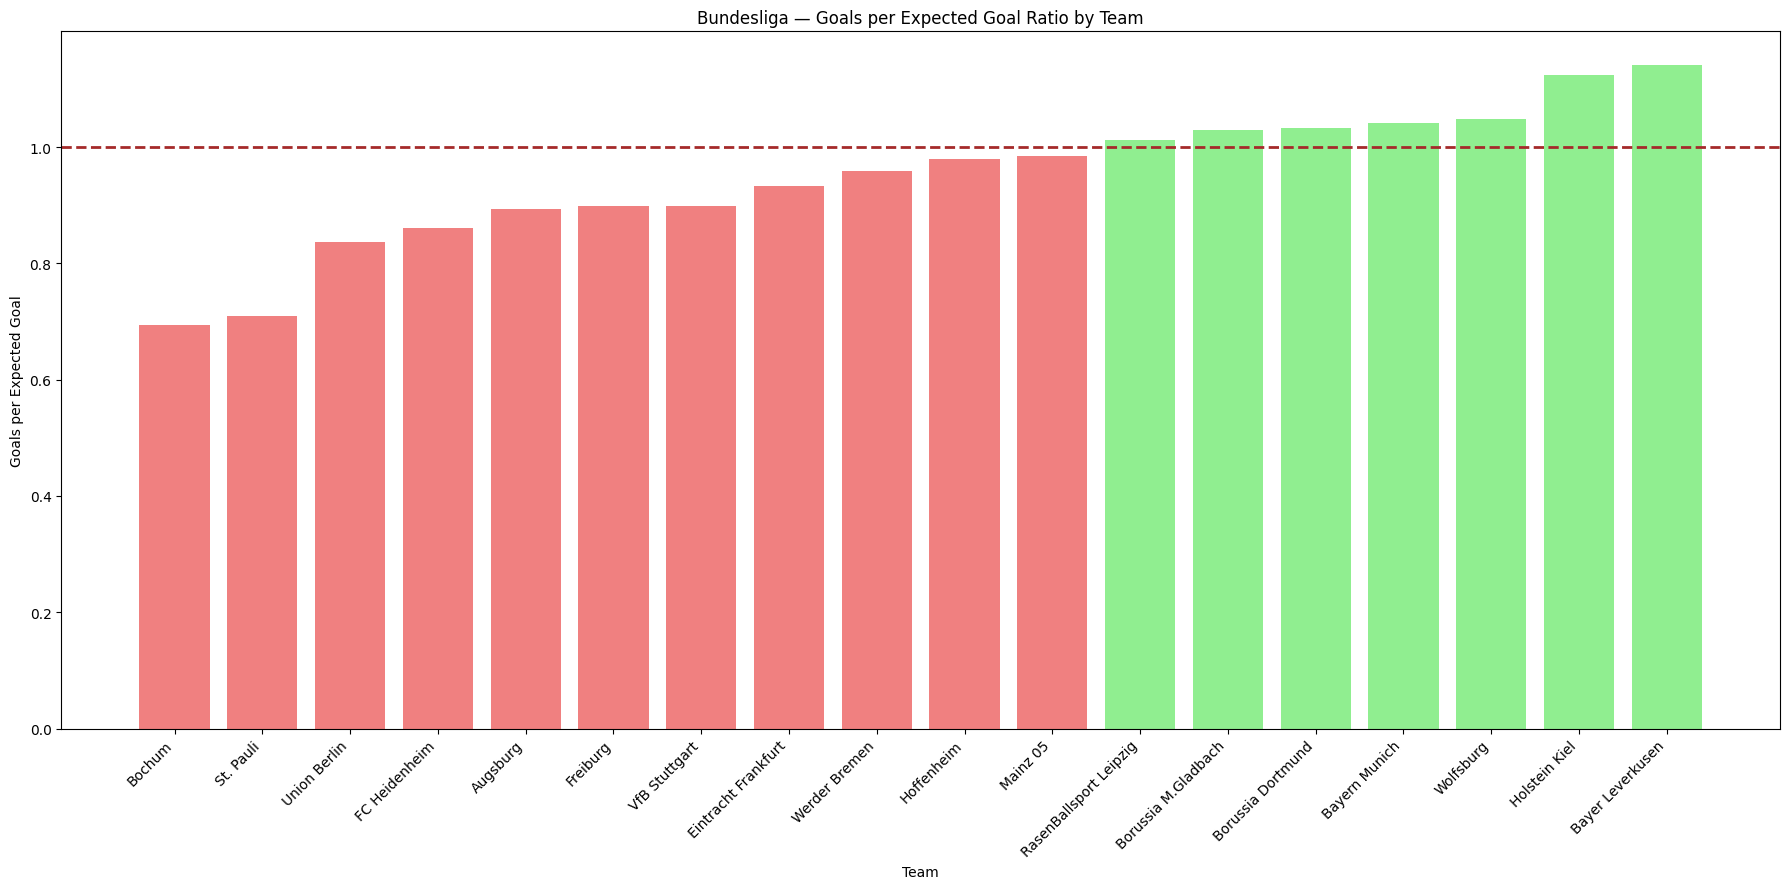

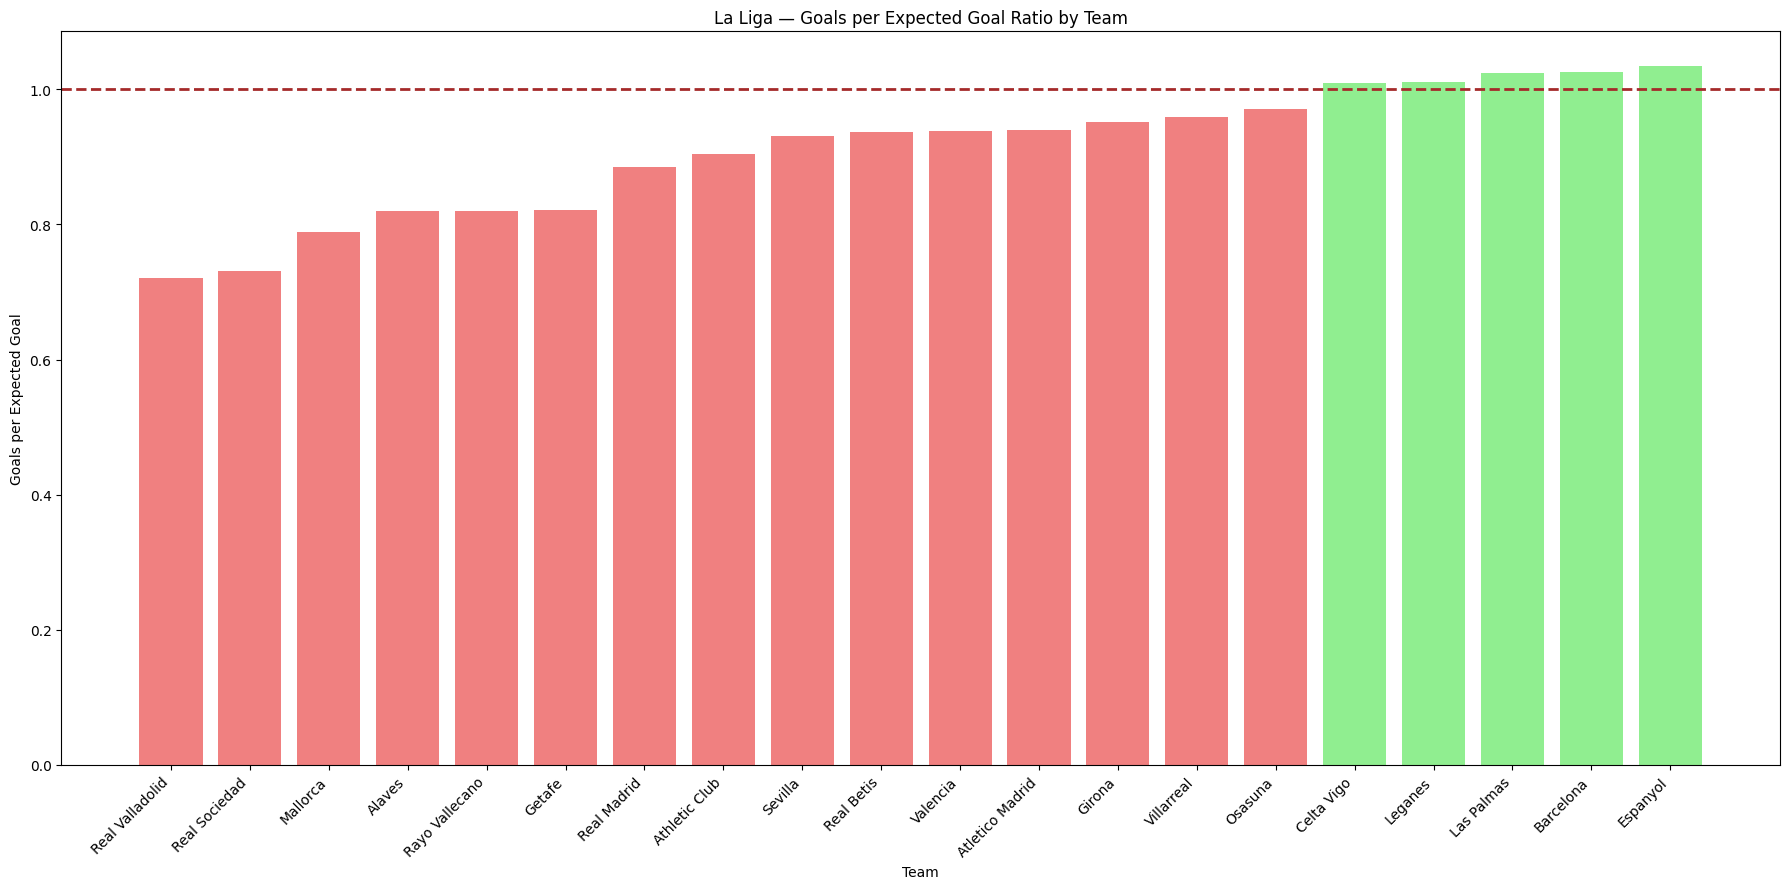

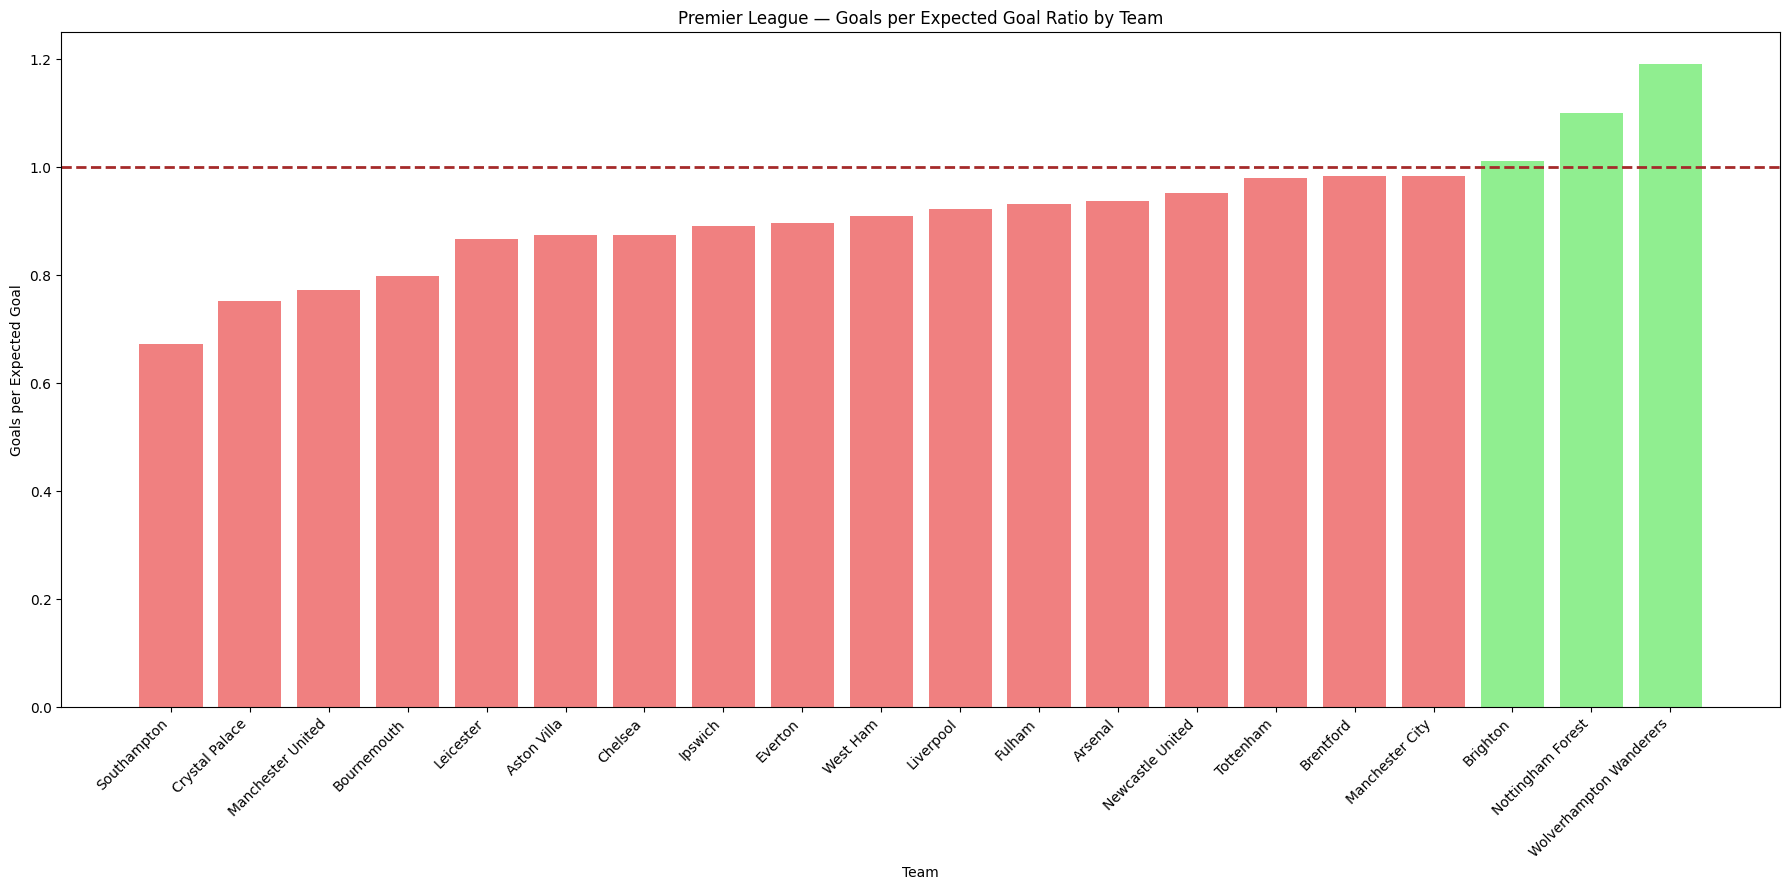

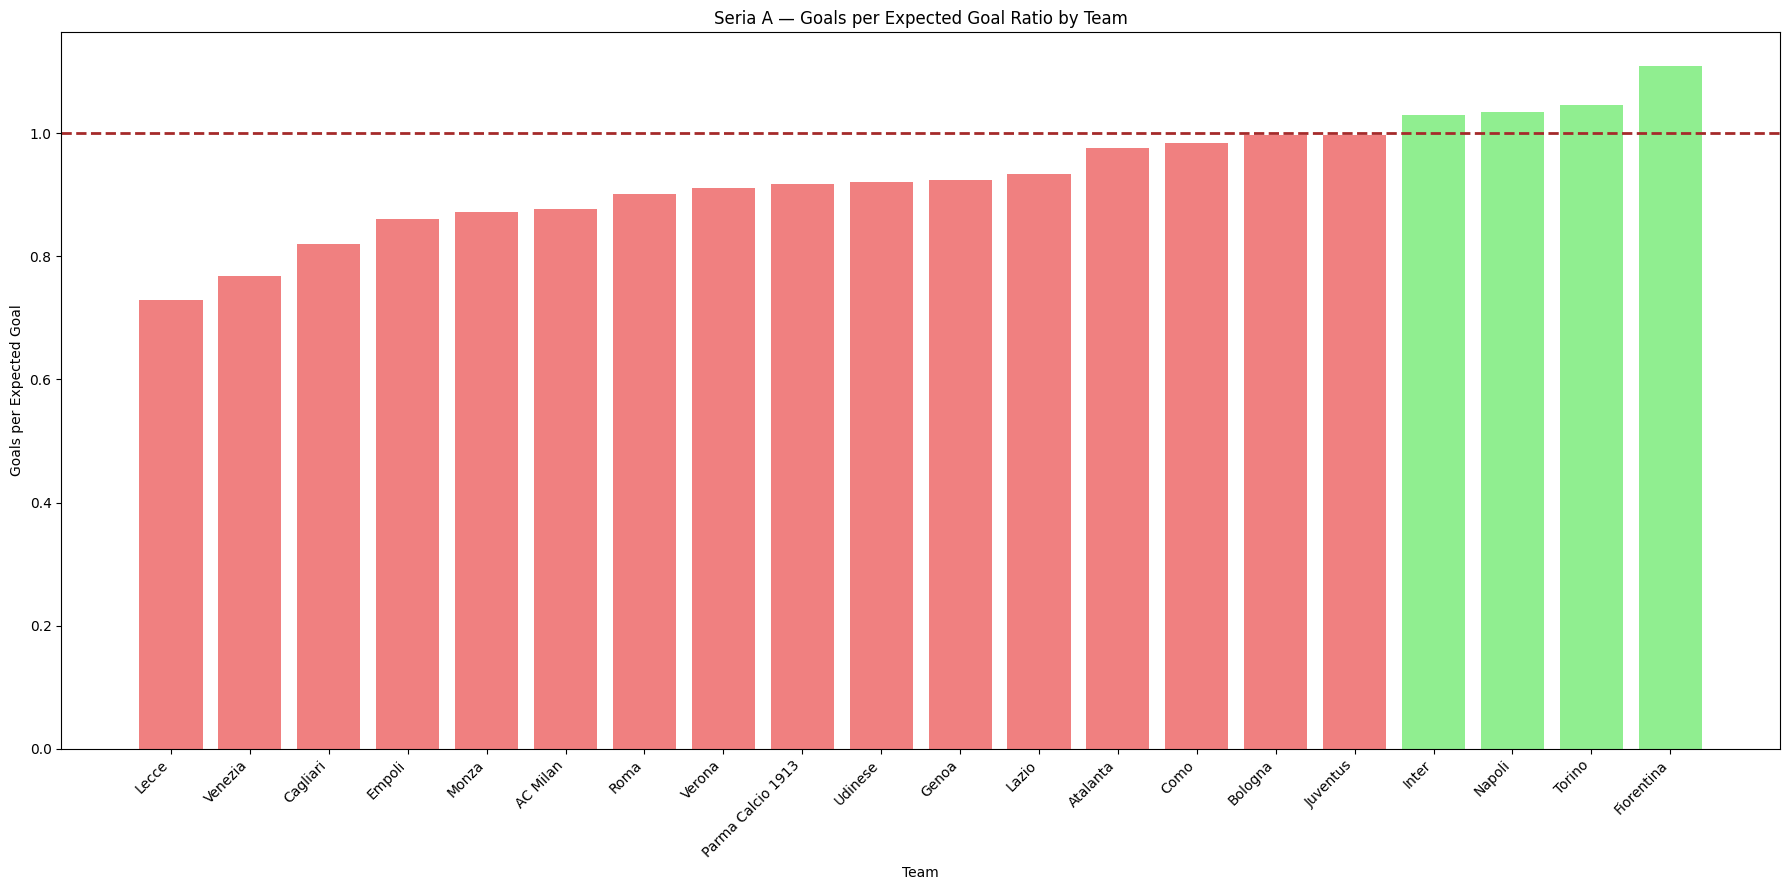

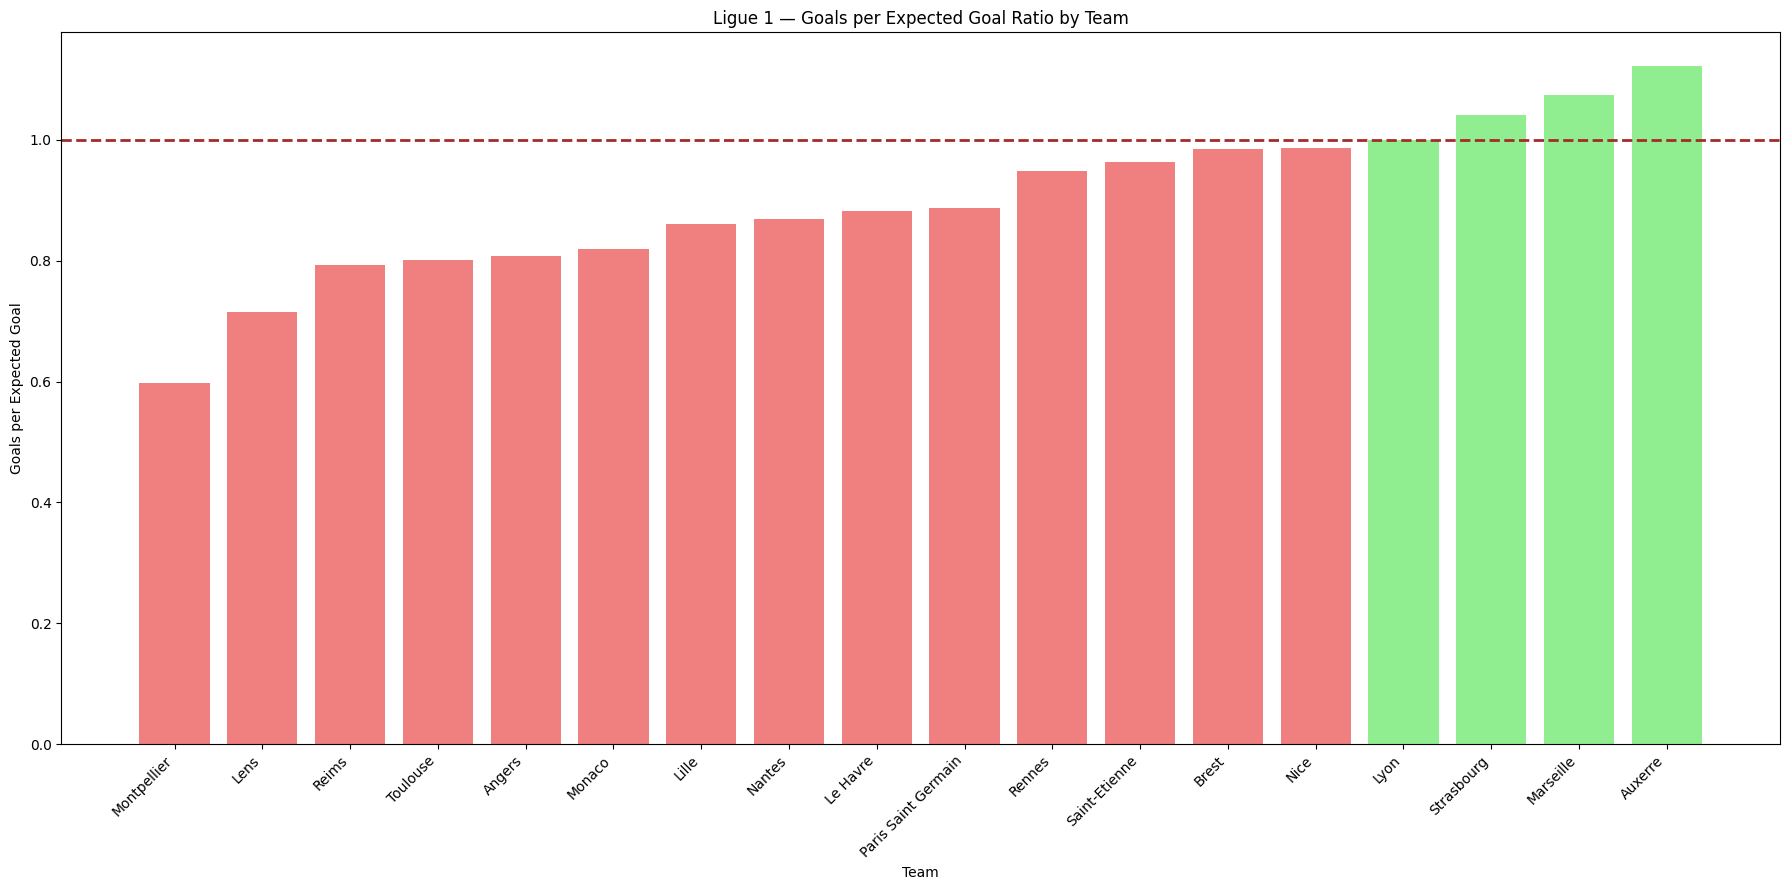

In [12]:
# Define a function to plot a bar chart of goals per expected goal (goals per xG) for each team given the league
def plot_goals_per_xg_ratio(team_df, league_name, league_title):
    df = team_df[team_df['league'] == league_name].sort_values(by='goals_per_xG')
    colors = np.where(df['goals_per_xG'] >= 1, 'lightgreen', 'lightcoral')

    plt.figure(figsize=(18, 9))
    plt.axhline(y=1, color='brown', linestyle='--', linewidth=2, label='y=1')
    plt.bar(df['team'], df['goals_per_xG'], color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Team')
    plt.ylabel('Goals per Expected Goal')
    plt.title(f'{league_title} — Goals per Expected Goal Ratio by Team')
    plt.tight_layout()
    plt.show()

# Call the function
for league_code, league_name in leagues.items():
    plot_goals_per_xg_ratio(team_df, league_code, league_name)

The bar plots show the ratio of actual to expected goals for each team in the top five leagues. Values above 1 indicate teams outperforming expectations, while values below 1 suggest underperformance in goal scoring. The plots show that there are more teams underperforming than overperforming.

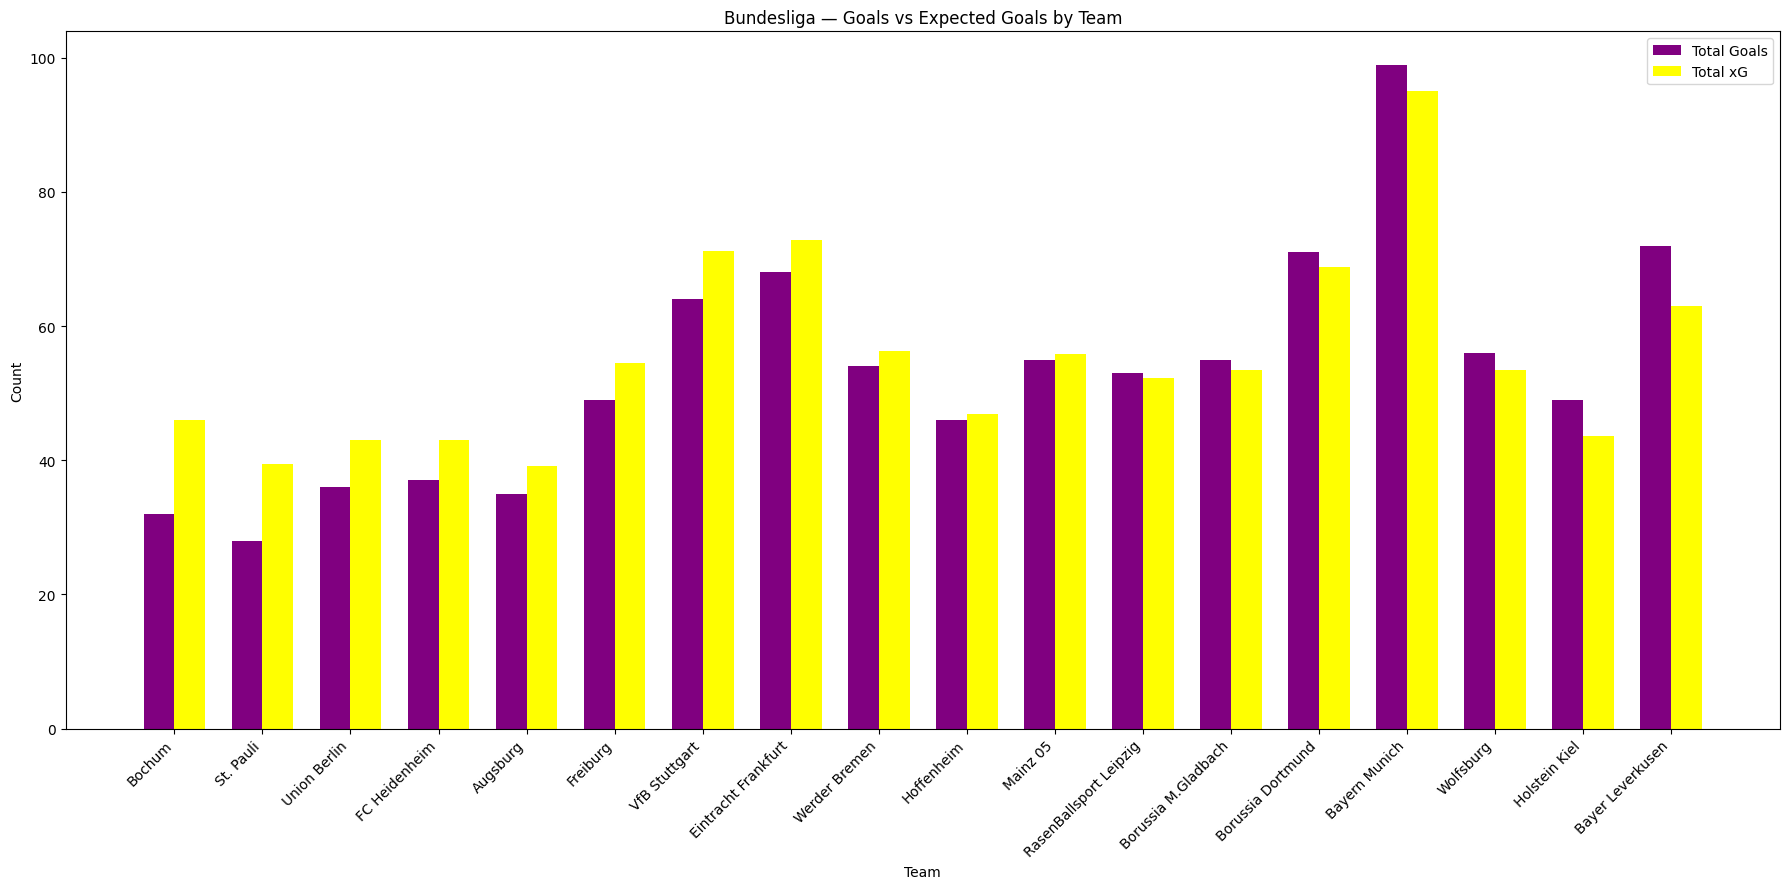

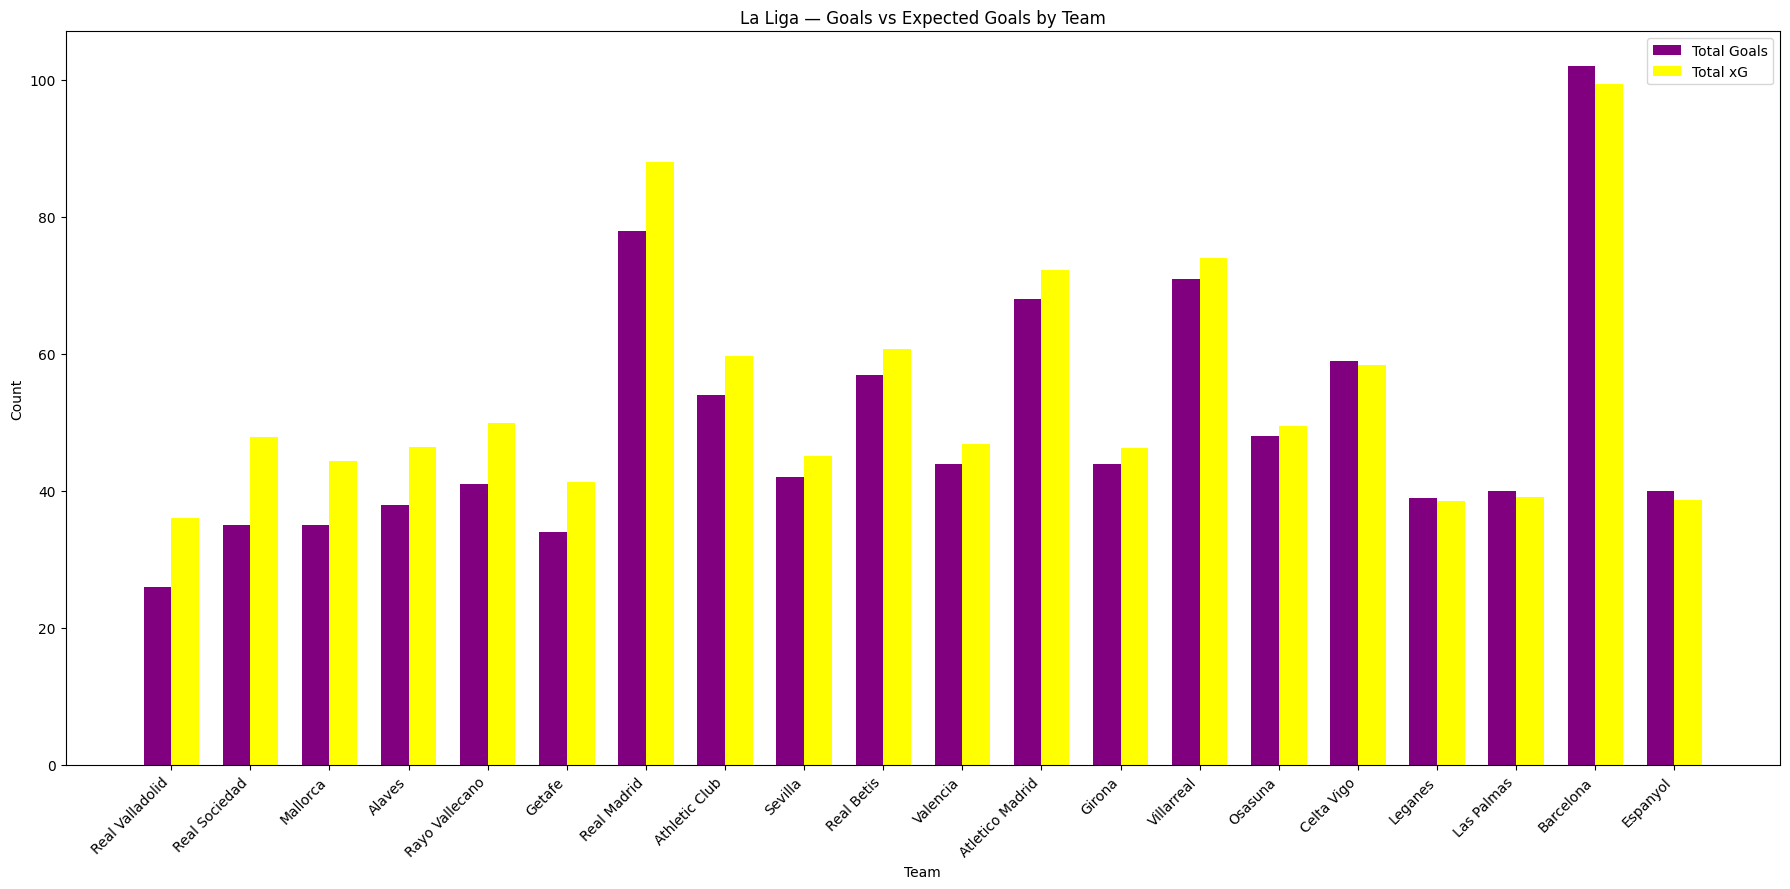

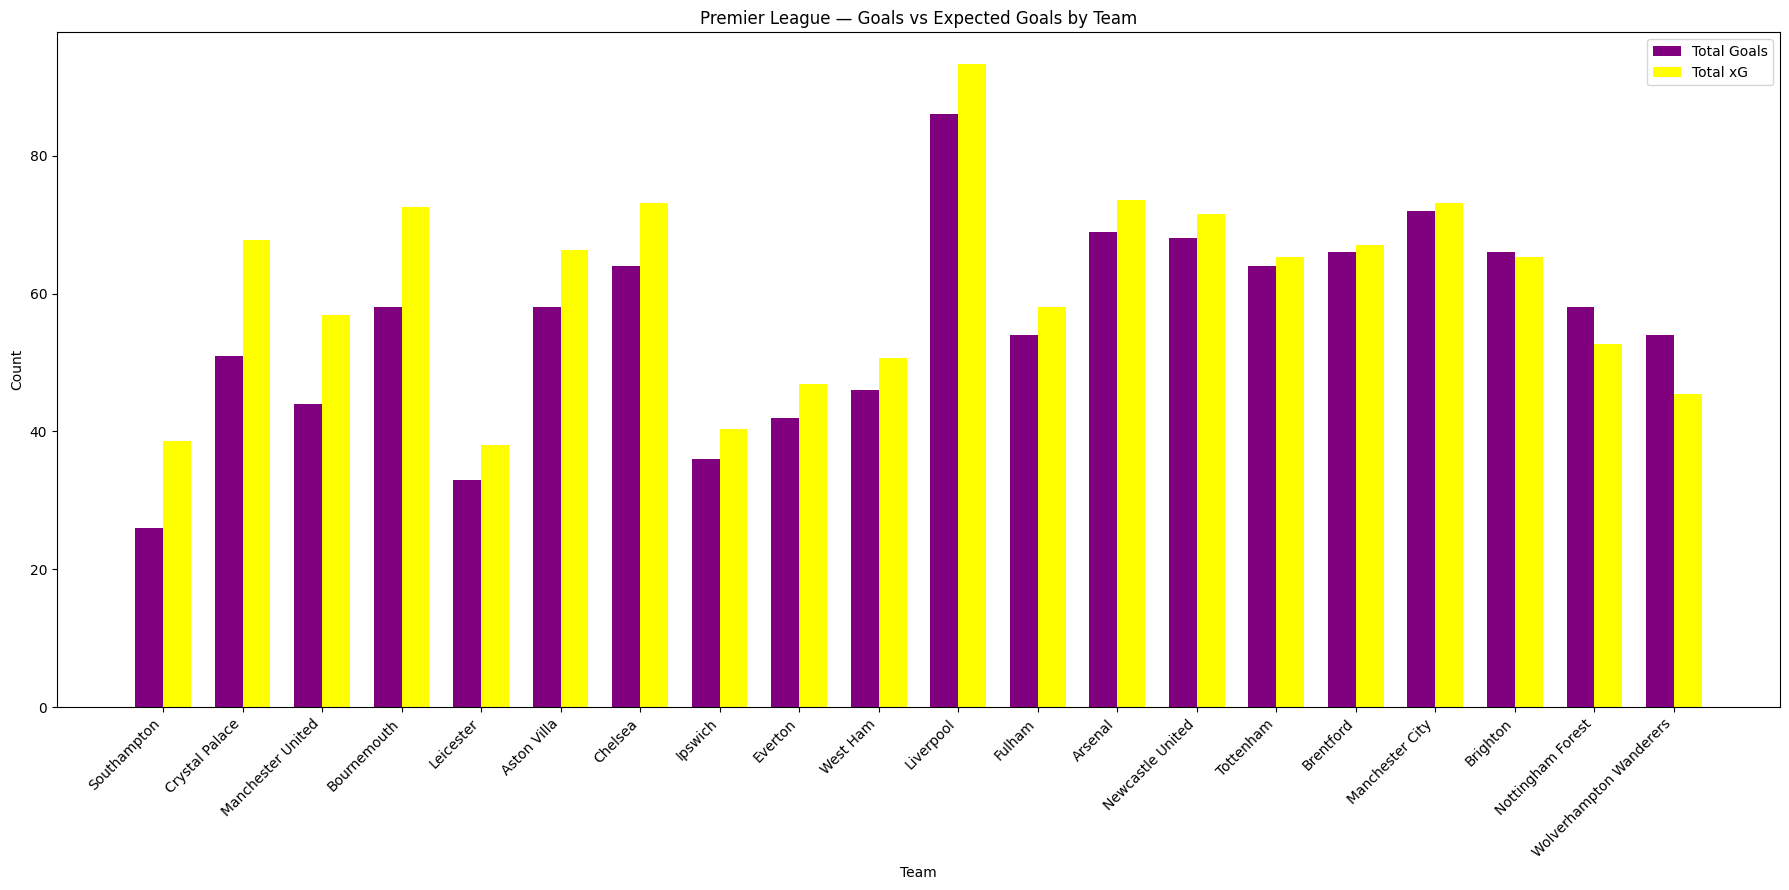

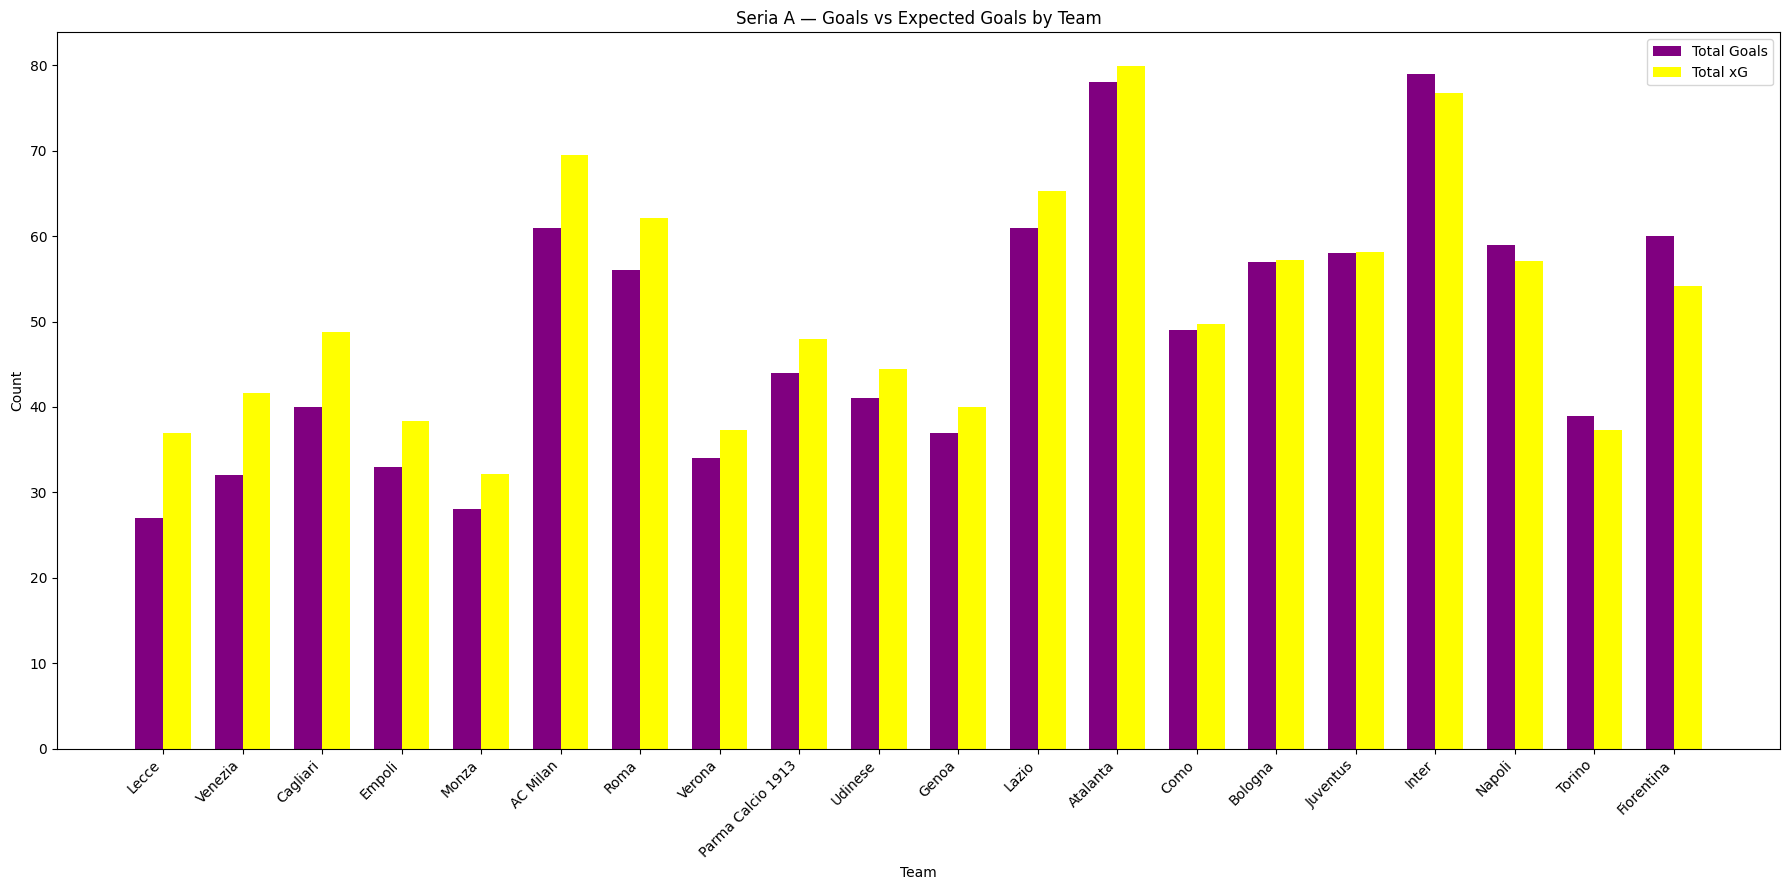

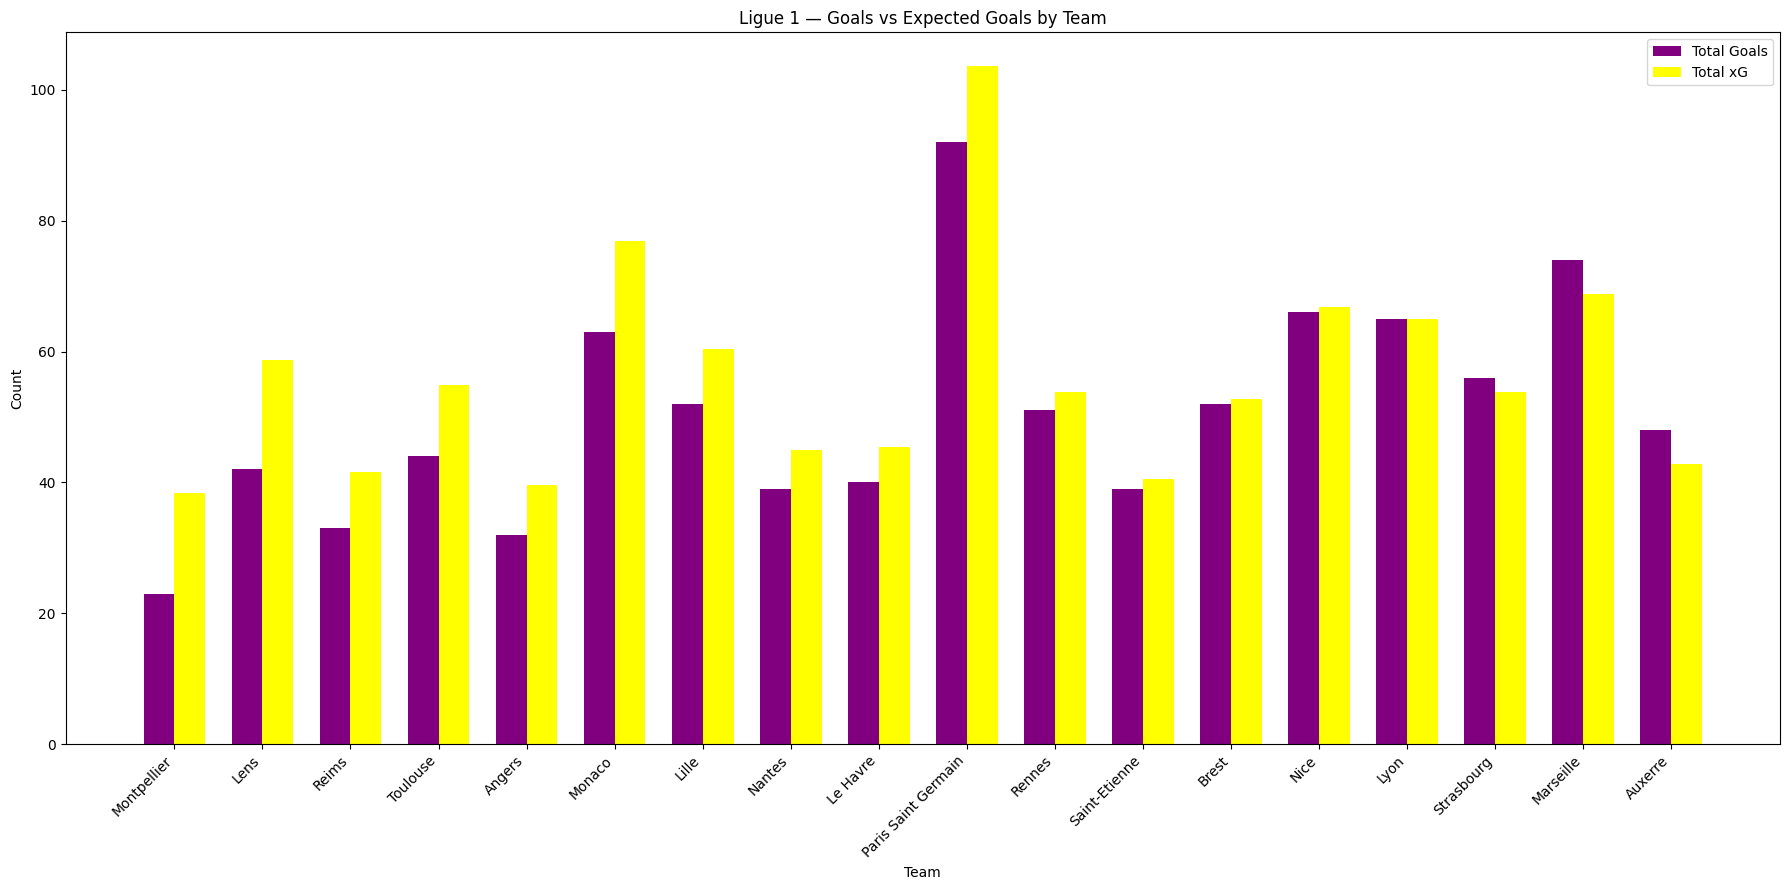

In [13]:
# Define a function to print a bar chart comparing total goals and expected goals (xG) for each team given the league
def plot_goals_vs_xg(team_df, league_name, league_title):
    df = team_df[team_df['league'] == league_name].sort_values(by='goals_per_xG')
    
    x = np.arange(len(df['team']))  # label locations
    width = 0.35  # bar width

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.bar(x - width/2, df['total_goals'], width, label='Total Goals', color='purple')
    ax.bar(x + width/2, df['total_xG'], width, label='Total xG', color='yellow')

    ax.set_xlabel('Team')
    ax.set_ylabel('Count')
    ax.set_title(f'{league_title} — Goals vs Expected Goals by Team')
    ax.set_xticks(x)
    ax.set_xticklabels(df['team'], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function
for league_code, league_name in leagues.items():
    plot_goals_vs_xg(team_df, league_code, league_name)

## Prediction for 2025/2026

In [14]:
# Define a function to print the top 3 teams by expected points in the league
def print_top_three_teams_by_league(team_df):
    leagues = ['Bundesliga', 'EPL', 'Serie_A', 'La_liga', 'Ligue_1']
    for league in leagues:
        # Filter and get top 3 teams by total_xP in the league
        top_teams = team_df[team_df['league'] == league].sort_values(by='total_xP', ascending=False).head(3)
        print(f"Top 3 teams in {league}:")
        if not top_teams.empty:
            for idx, team_name in enumerate(top_teams['team'], start=1):
                print(f"{idx}. {team_name}")
        else:
            print(f"No data for league: {league}")
        print() 

# Call the function
print_top_three_teams_by_league(team_df)

Top 3 teams in Bundesliga:
1. Bayern Munich
2. Borussia Dortmund
3. Eintracht Frankfurt

Top 3 teams in EPL:
1. Liverpool
2. Arsenal
3. Bournemouth

Top 3 teams in Serie_A:
1. Napoli
2. Atalanta
3. Inter

Top 3 teams in La_liga:
1. Barcelona
2. Real Madrid
3. Villarreal

Top 3 teams in Ligue_1:
1. Paris Saint Germain
2. Monaco
3. Nice



Based solely on the expected points from the previous season, a prediction can be made for the top-three-ranked teams in each of the five major European leagues—Bundesliga, EPL, La Liga, Serie A, and Ligue 1—for the upcoming season. This approach assumes that the teams with the highest expected points are likely to continue performing strongly and convert chances more effectively in the future.

However, it is important to acknowledge the limitations of this method. While expected points provide a useful measure of underlying team performance, they do not account for crucial factors such as player transfers, injuries, managerial changes, tactical evolution, or variance in finishing and defensive outcomes. Football is highly dynamic, and success over a full season is influenced by a combination of statistics, strategy, and situational factors. Therefore, this prediction should be seen as a baseline estimate, highlighting which teams performed well in terms of expected outcomes, rather than a definitive forecast.